## 2.0 Model Training  
### 2.1 Import Data and Required Packages

In [281]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling 
from sklearn.metrics import accuracy_score
# logistic regression
from sklearn.linear_model import LogisticRegression
# naive bayes
from sklearn.naive_bayes import GaussianNB
# Support Vector Machine
from sklearn import svm
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# xgboost
import xgboost as xgb


### 2.2 Import data

In [282]:
df = pd.read_csv('../data/raw/Delawnymous_SSY_20170813.csv')

In [283]:
df.head()

,sid,school_year,school_code,s_male,s_birth_year,s_race,s_frpl,s_ell,s_iep,s_grade_level,...,std_scaled_e,sat_math_score,sat_verbal_score,sat_writing_score,hs_diploma,hs_diploma_year,sch_charter,sch_alternative,sch_vocational,record_type
0,75357,2013,214,1,1999,Black,Free Lunch,0.0,0.0,7,...,-0.779797,NaN,NaN,NaN,0,NaN,0,0,0,Fake data
1,77859,2012,206,0,2008,Asian,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Fake data
2,252963,2013,376,0,1997,White,Free Lunch,0.0,1.0,7,...,0.150554,NaN,NaN,NaN,0,NaN,0,0,0,Fake data
3,126847,2016,401,1,2002,Black,Does Not Qualify,0.0,1.0,8,...,-1.154834,NaN,NaN,NaN,0,NaN,0,1,0,Fake data
4,91450,2012,185,1,2003,White,Does Not Qualify,0.0,0.0,3,...,0.286661,NaN,NaN,NaN,0,NaN,0,0,0,Fake data


In [284]:
df = df[df.s_grade_level == '12']
df.head()


,sid,school_year,school_code,s_male,s_birth_year,s_race,s_frpl,s_ell,s_iep,s_grade_level,...,std_scaled_e,sat_math_score,sat_verbal_score,sat_writing_score,hs_diploma,hs_diploma_year,sch_charter,sch_alternative,sch_vocational,record_type
25,154585,2013,265,0,1994,Black,Does Not Qualify,0.0,0.0,12,...,NaN,NaN,NaN,NaN,1,2013.0,0,0,0,Fake data
33,221022,2014,323,1,1996,Black,Free Lunch,0.0,0.0,12,...,NaN,NaN,NaN,NaN,1,2014.0,0,1,0,Fake data
48,72985,2013,394,0,1995,Asian,Does Not Qualify,0.0,0.0,12,...,NaN,NaN,NaN,NaN,1,2013.0,0,1,0,Fake data
67,183695,2014,179,1,1996,White,Does Not Qualify,0.0,0.0,12,...,NaN,380.0,380.0,290.0,1,2014.0,0,0,0,Fake data
82,81766,2012,191,1,1993,White,Does Not Qualify,0.0,0.0,12,...,NaN,NaN,NaN,NaN,1,2012.0,0,0,0,Fake data


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46371 entries, 25 to 759512
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sid                46371 non-null  int64  
 1   school_year        46371 non-null  int64  
 2   school_code        46371 non-null  int64  
 3   s_male             46371 non-null  int64  
 4   s_birth_year       46371 non-null  int64  
 5   s_race             46371 non-null  object 
 6   s_frpl             46371 non-null  object 
 7   s_ell              46371 non-null  float64
 8   s_iep              46371 non-null  float64
 9   s_grade_level      46371 non-null  object 
 10  s_days_absent      31503 non-null  float64
 11  s_days_suspended   46371 non-null  float64
 12  std_scaled_m       189 non-null    float64
 13  std_scaled_e       187 non-null    float64
 14  sat_math_score     26390 non-null  float64
 15  sat_verbal_score   26390 non-null  float64
 16  sat_writing_score  26384 

### 2.3 Select variables of importance

In [286]:
temp = df[['s_male', 's_race', 's_frpl','s_ell', 's_iep',
           's_days_absent','s_days_suspended', 'sat_math_score', 'sat_verbal_score', 'sat_writing_score',
           'hs_diploma']]

In [287]:
cross_tab = pd.crosstab(index=temp['hs_diploma'], columns='count')

# Display the crosstab
print(cross_tab)


col_0       count
hs_diploma       
0            4408
1           41963


### 2.4 Update int to boolean for demographics

In [207]:
#temp.loc[df['s_male'] == 0, 's_male'] = 'female'
#temp.loc[df['s_male'] == 1, 's_male'] = 'male'
#temp.loc[df['s_ell'] == 0, 's_ell'] = 'not_ell'
#temp.loc[df['s_ell'] == 1, 's_ell'] = 'ell'
#temp.loc[df['s_iep'] == 0, 's_iep'] = 'no_iep'
#temp.loc[df['s_iep'] == 1, 's_iep'] = 'iep'
#temp.loc[df['sch_charter'] == 0, 'sch_charter'] = 'no_charter'
#temp.loc[df['sch_charter'] == 1, 'sch_charter'] = 'yes_charter'
#temp.loc[df['sch_alternative'] == 0, 'sch_alternative'] = 'no_alt'
#temp.loc[df['sch_alternative'] == 1, 'sch_alternative'] = 'yes_alt'
#temp.loc[df['sch_vocational'] == 0, 'sch_vocational'] = 'no_voc'
#temp.loc[df['sch_vocational'] == 1, 'sch_vocational'] = 'yes_voc'


In [288]:
temp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46371 entries, 25 to 759512
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   s_male             46371 non-null  int64  
 1   s_race             46371 non-null  object 
 2   s_frpl             46371 non-null  object 
 3   s_ell              46371 non-null  float64
 4   s_iep              46371 non-null  float64
 5   s_days_absent      31503 non-null  float64
 6   s_days_suspended   46371 non-null  float64
 7   sat_math_score     26390 non-null  float64
 8   sat_verbal_score   26390 non-null  float64
 9   sat_writing_score  26384 non-null  float64
 10  hs_diploma         46371 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 4.2+ MB


In [289]:
vars = temp.columns
unique_values_counts = temp.nunique()


# Display the result
print(unique_values_counts)

s_male                 2
s_race                 7
s_frpl                 3
s_ell                  2
s_iep                  2
s_days_absent        143
s_days_suspended      47
sat_math_score        61
sat_verbal_score      61
sat_writing_score     61
hs_diploma             2
dtype: int64


In [291]:
for var in vars:
    unique = temp[var].unique()
    print(var, unique)

s_male [0 1]
s_race ['Black' 'Asian' 'White' 'Hispanic' 'Native American' 'Multiple' 'Other']
s_frpl ['Does Not Qualify' 'Free Lunch' 'Reduced Lunch']
s_ell [0. 1.]
s_iep [0. 1.]
s_days_absent [  0.  23.  26.   9.  nan  18.  11.   1.  16.   5.  55.  17.   4.  32.
  51.  25.   7.  37.  29.  15.  21.   2.  12.   6.  27. 114.  10.   3.
  19.   8.  13.  63.  20.  42.  22.  28. 108.  30.  14. 101.  40.  59.
  41.  38.  80.  24.  52.  33.  36.  31.  97.  86.  49.  56.  34.  60.
  47. 115.  50.  61.  78.  39.  45.  48.  95.  54.  58. 104.  74. 111.
  35.  46.  44.  79. 103.  87.  68.  53.  70.  65. 109. 151.  75.  64.
  82.  88. 121.  67.  43.  76.  81.  57.  71.  89.  73.  96. 102. 126.
  62.  83. 113.  84.  66. 106.  69. 120.  94. 177.  85. 112. 144. 107.
  72. 118. 123. 131. 125. 124.  98. 100.  91.  92. 117. 171.  77. 119.
 105. 164. 136. 166.  90. 129. 138. 168. 116.  93. 163. 150. 140. 141.
 127. 122.  99. 133.]
s_days_suspended [ 0. 13.  2.  1.  9.  5. 11. 10.  3. 26.  4.  6.  7.  8. 1

### 2.5 Train test split

In [292]:
from sklearn.model_selection import train_test_split
X = temp.drop(columns = ['hs_diploma'], axis = 1)
y = temp['hs_diploma']

### Class distribution

In [293]:
diploma_cnts = y.value_counts()
diploma_cnts


hs_diploma
1    41963
0     4408
Name: count, dtype: int64

<Axes: ylabel='count'>

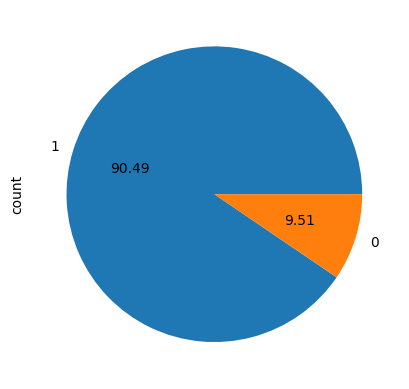

In [294]:
# show pie chart
y.value_counts().plot.pie(autopct = '%.2f')

([<matplotlib.patches.Wedge at 0x29e28fd90>,
 [Text(-1.0513119450754804, 0.32364053229101303, '1'),
  Text(1.051311960226186, -0.32364048307554877, '0')],
 [Text(-0.5734428791320801, 0.17653119943146162, '90.49'),
  Text(0.5734428873961014, -0.17653117258666293, '9.51')])

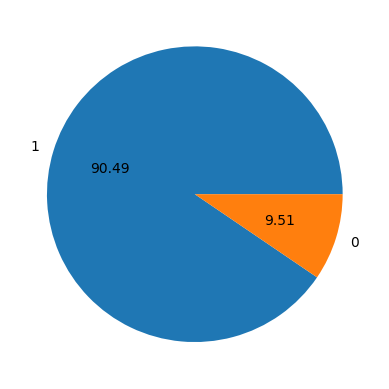

In [295]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct = '%.2f', labels = diploma_cnts.index)

### Class balancing

In [296]:
# split the data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 67)

In [297]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37096, 10), (37096,), (9275, 10), (9275,))

<Axes: ylabel='count'>

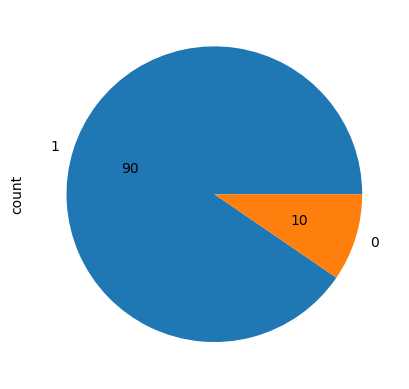

In [246]:
y_train.value_counts().plot.pie(autopct = '%2.f')

In [247]:
y_train.value_counts()

hs_diploma
1    33552
0     3544
Name: count, dtype: int64

### Random Undersampling

In [260]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # numerical
#rus = RandomUnderSampler(sampling_strategy='not minority') # string

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

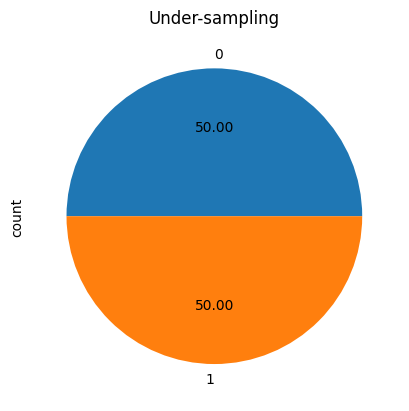

In [261]:
ax = y_train_rus.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling")

In [262]:
y_train_rus.value_counts()

hs_diploma
0    3544
1    3544
Name: count, dtype: int64

In [298]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import make_column_selector as selector

numeric_features = X.select_dtypes(exclude = 'object').columns
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = X.select_dtypes(include='object').columns
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="object")),
        ("cat", categorical_transformer, selector(dtype_include="object")),
    ]
)

In [299]:
X_train_rus = preprocessor.fit_transform(X_train)


In [300]:
X_test = preprocessor.transform(X_test)

In [301]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [303]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_rus, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rjw/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [304]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.906415,0.999049,0.907158
Support Vector Machines,0.906846,1.000000,0.906846
Decision Trees,0.865660,0.942456,0.912303
Random Forest,0.893477,0.977767,0.911247
Naive Bayes,0.833315,0.888598,0.924657
K-Nearest Neighbor,0.893801,0.978956,0.910639


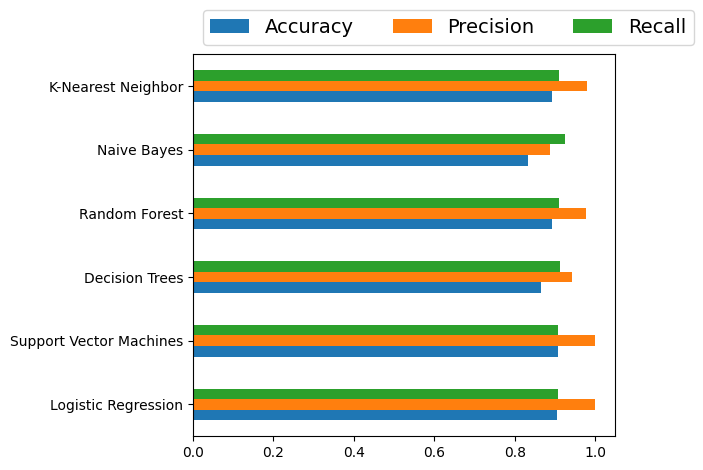

In [305]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()